<a href="https://colab.research.google.com/github/melissang7/Python-IA-Melissa/blob/main/Risco_cr%C3%A9dito(10_06).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB         #tabela probabilística
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pickle

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantias = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:,0] = label_enconder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_enconder_dividas.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_enconder_garantias.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_enconder_renda.fit_transform(x_risco_credito[:,3])
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle      #transformar em arquivo pkl

with open('/content/risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()

In [ ]:
naive_risco_credito.fit(x_risco_credito, y_risco_credito)   # treinamento da IA

GaussianNB()

In [ ]:
#História Boa(0), Dívida Alta(0). Garantia Nenhuma(1), renda > 35(2)
#História Ruim(2), Dívida Alta(0). Garantia Adequada(0), 15 < renda <= 35(1)

In [ ]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,1]])    #predict = faz a predição

In [ ]:
previsao          # baixo = o risco de crédito é baixo, ou seja, maiores chances da pessoa pagar a dívida

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
#historia = input('Digite a história: Boa[0], Moderado [1], Ruim [2]: ')
#divida = input('Digite a dívida: Alta [0], Baixa [1]: ')
#garantia = input('Digite a Garantia: [0], Nenhuma [1]: ')
#renda = input('Digite a renda: menor que 15[0], entre 15 e 35 [1], maior que 35[2]: ')

In [ ]:
# previsao = naive_risco_credito.predict([[historia,divida,garantia,renda]])
# previsao

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Atividades IA/credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)                                                                 

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape                     #1500 linhas do dataset são para treinamento (75%)

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape             #o resto é para teste (25%)

((500, 3), (500,))

In [ ]:
naive_credit_data = GaussianNB()

Treinamento

In [ ]:
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)                    #fit encaixa x e y no método GaussianNB(treinamento)

GaussianNB()

Teste

In [ ]:
previsoes = naive_credit_data.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score               #taxa de acertividade

In [ ]:
accuracy_score(y_credit_teste, previsoes)          # o nosso algortimo tem uma taxa de acertividade

0.938

In [ ]:
from sklearn.metrics import confusion_matrix                  #

In [ ]:
confusion_matrix(y_credit_teste, previsoes)                  #

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
# 0 (pagou), 1 (não pagou). Eixo Y (o que ele pensou), Eixo X (a resposta)

0.938

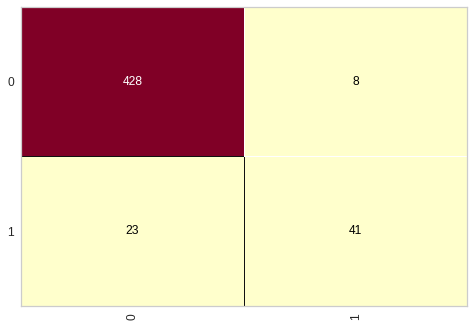

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_teste, y_credit_teste)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



**CENSUS**

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Atividades IA/census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape 

((4885, 108), (4885,))

In [ ]:
naive_census_data = GaussianNB()

In [ ]:
naive_census_data.fit(x_census_treinamento, y_census_treinamento)   

GaussianNB()

In [ ]:
previsores = naive_census_data.predict(x_census_teste)
previsores

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy_score(y_census_teste, previsores)

0.4767656090071648

In [ ]:
confusion_matrix(y_census_teste, previsores)   

array([[1172, 2521],
       [  35, 1157]])

0.4767656090071648

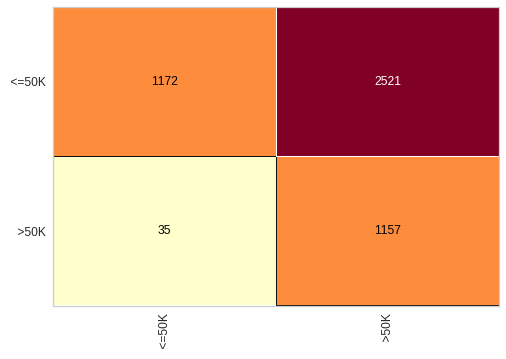

In [ ]:
cm = ConfusionMatrix(naive_census_data)
cm.fit(x_census_teste, y_census_teste)
cm.score(x_census_teste, y_census_teste)